# Video: Using Gradient Descent in 1D

This video shows off gradient descent by using it to optimize a one parameter model instead of Newton's method.

Script:
* Let's walk through a simple example of gradient descent.
* I will go back to our old example from week 3 where we plotted the loss function for a simple model on a small data set.


## Average L2 Loss vs Fixed Prediction


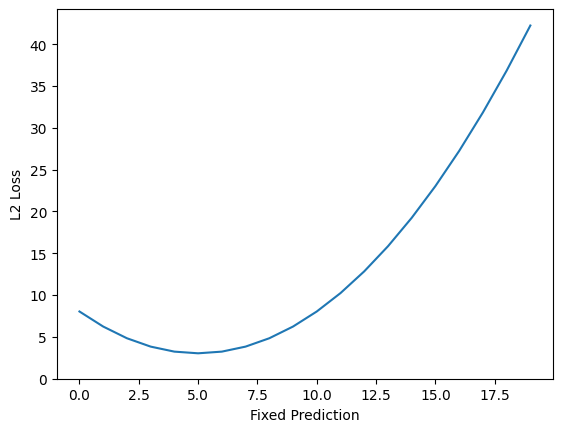

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

data = [1, 2, 4, 6, 12]
xs = range(20)

def mean(vs):
    vs = list(vs)
    return np.mean(vs) / len(vs)

plt.plot(xs, [mean((x - v)**2 for v in data) for x in xs])
plt.gca().set_ylim(0)
plt.xlabel("Fixed Prediction")
plt.ylabel("L2 Loss")
None

Script:
* In this scenario, we had a small number of data points, and we were modeling a trivial model that just predict the same number, the same fixed prediction, for every input.
* So the question was, which fixed prediction would give the best, lowest loss value?
* This chart here shows the average loss for that model depending on the fixed prediction.
* Let's look at the derivative now.

## Derivative of Average L2 Loss


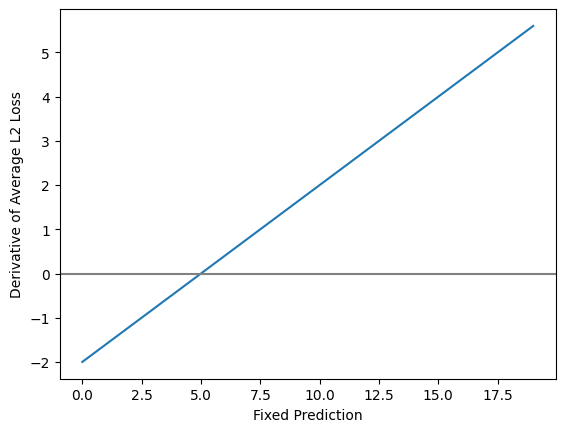

In [ ]:
plt.plot(xs, [2 * mean((x - v) for v in data) for x in xs])
plt.axhline(y=0, color="grey")
plt.xlabel("Fixed Prediction")
plt.ylabel("Derivative of Average L2 Loss")
None

Script:
* On the left, the derivative is positive and increases as the prediction increases.
* On the right, the derivative is negative and decreasing more as the prediction decreases.
* Let's combine those derivatives with the loss function and visualize the gradients.

## Average L2 Loss and Gradients


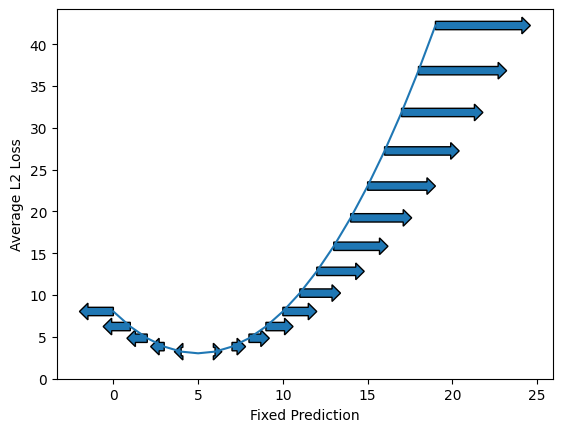

In [ ]:
plt.plot(xs, [mean((x - v)**2 for v in data) for x in xs])
plt.gca().set_ylim(0)
plt.xlabel("Fixed Prediction")
plt.ylabel("Average L2 Loss")

for x in xs:
    gradient = 2 * mean((x - v) for v in data)
    plt.arrow(x, mean((x - v)**2 for v in data), gradient, 0, head_length=0.5, head_width=2, width=1, length_includes_head=True)

None

Script:
* This chart combines the loss function with the gradients.
* The gradients of the loss function are the direction and magnitude of the fastest increase in the loss function.
* You can see the gradients are all pointing away from the minimum - they are pointing in the direction of the fastest increases.
* And in this case, they are smaller closer to the minimum where it looks flatter.
* A brief comment about terminology - we usually use the word derivative when there is just one parameter, and the phrase partial derivative when we have multiple parameters and we are looking at the derivative with respect to just one of them.
* The word gradient refers to the vector of partial derivatives, and gives a direction of the fastest increase.
* In most contexts, gradients are referring to just the direction and not the magnitude.
* But for machine learning and data science, it usually includes the magnitude too.

## Average L2 Loss and Parameter Updates with Learning Rate 1


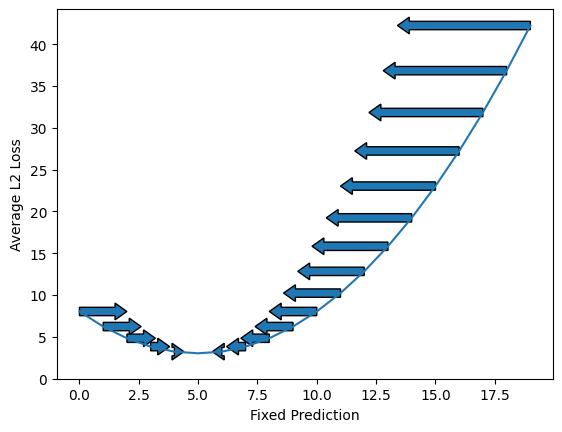

In [ ]:
plt.plot(xs, [mean((x - v)**2 for v in data) for x in xs])
plt.gca().set_ylim(0)
plt.xlabel("Fixed Prediction")
plt.ylabel("Average L2 Loss")

for x in xs:
    gradient = 2 * mean((x - v) for v in data)
    plt.arrow(x, mean((x - v)**2 for v in data), -1 * gradient, 0, head_length=0.5, head_width=2, width=1, length_includes_head=True)

None

Script:
* This chart flipped the direction of the gradients to get the parameter updates with learning rate one.
* For this problem, the fixed prediction updates are larger when far from the minimum.
* And they are smaller when they get closer to the minimum.
* And they never overshoot.
* This is not always the case -- for example, if the loss function was summed instead of averaged, the loss function and gradient would be five times larger and the updates with learning rate one would always overshot.

## Average L2 Loss and Parameter Updates with Learning Rate 0.5


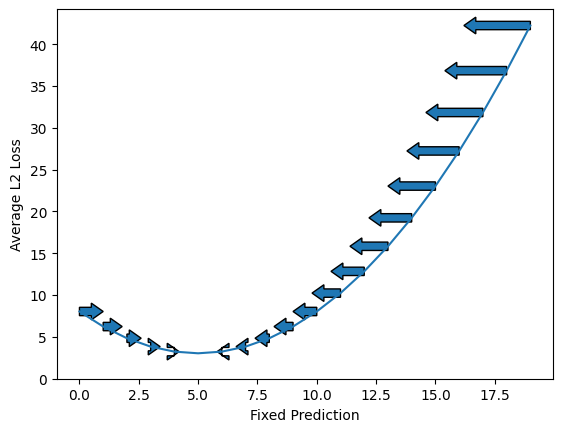

In [ ]:
plt.plot(xs, [mean((x - v)**2 for v in data) for x in xs])
plt.gca().set_ylim(0)
plt.xlabel("Fixed Prediction")
plt.ylabel("Average L2 Loss")

for x in xs:
    gradient = 2 * mean((x - v) for v in data)
    plt.arrow(x, mean((x - v)**2 for v in data), -0.5 * gradient, 0, head_length=0.5, head_width=2, width=1, length_includes_head=True)

None

Script:
* This chart shows the updates with the learning rate halved.
* More updates will be needed, but they are less likely to overshoot, and if they do overshoot, they will overshoot less.
* Learning rate will be a parameter that needs to be adjusted on a case by case basis, and may need to be update in the middle of optimizing a model.

Script:
* So why do we use gradient descent when it is more complicated than Newton's method?
* Newton's method just does not work when there is more than one parameter.
* Gradient descent does work.
* Gradient descent uses the same kind of linear approximation that Newton's method does, but it works with all the partial derivatives, not just one derivative.
* So gradient descent can work with unlimited numbers of parameters.
* A cost for that flexibility is the need for a learning rate to better adjust for interactions between parameters.
* That lets gradient descent use this locally linear analysis to update very complex models with billions of parameters.